# Explore here

In [92]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima import auto_arima

import warnings

In [124]:
warnings.filterwarnings("ignore")

In [125]:
data = pd.read_csv(r'C:\Users\samue\OneDrive\Escritorio\4GeeksAcademy\26a clase-Time-series\Time-series-1\data\raw\data')
df = pd.DataFrame(data)

In [126]:
df

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [128]:
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')
df.head()

,date,sales
0,2022-09-03,55.292157
1,2022-09-04,53.803211
2,2022-09-05,58.141693
3,2022-09-06,64.530899
4,2022-09-07,66.013633


In [129]:
df.columns = df.columns.str.strip()

In [130]:
df = df.set_index('date')
df

,sales
date,
2022-09-03,55.292157
2022-09-04,53.803211
2022-09-05,58.141693
2022-09-06,64.530899
2022-09-07,66.013633
...,...
2023-08-30,989.600354
2023-08-31,994.987326
2023-09-01,995.814415


In [131]:
# Seleccionar la columna que deseas utilizar como serie temporal
ts = df['sales']

In [132]:
ts.head()

date
2022-09-03    55.292157
2022-09-04    53.803211
2022-09-05    58.141693
2022-09-06    64.530899
2022-09-07    66.013633
Name: sales, dtype: float64

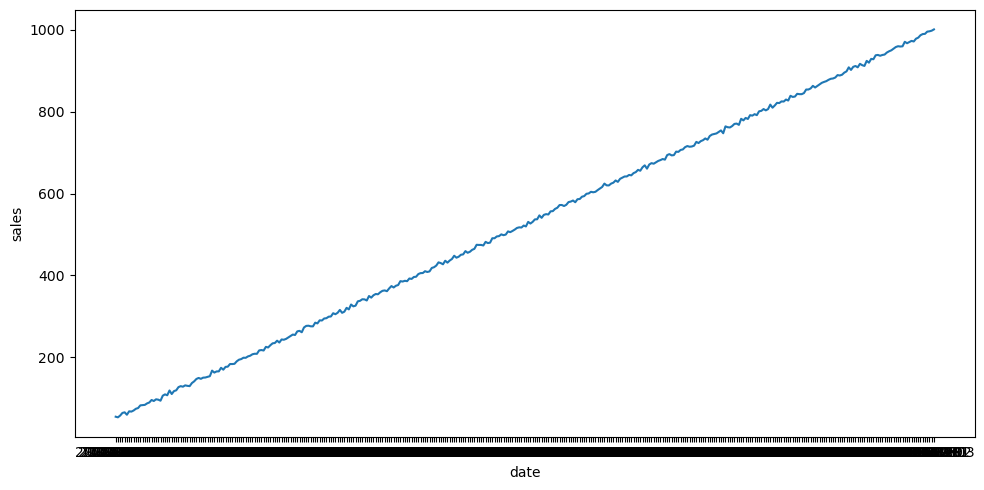

In [133]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)

plt.tight_layout()

plt.show()

In [134]:
decomposition = seasonal_decompose(ts, period = 12)
decomposition

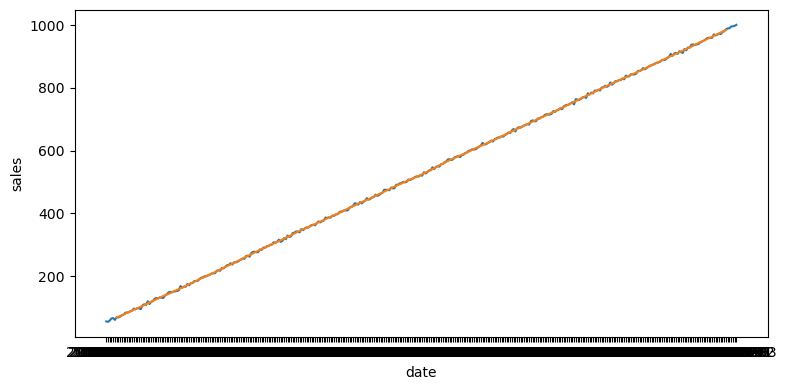

In [135]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = ts)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

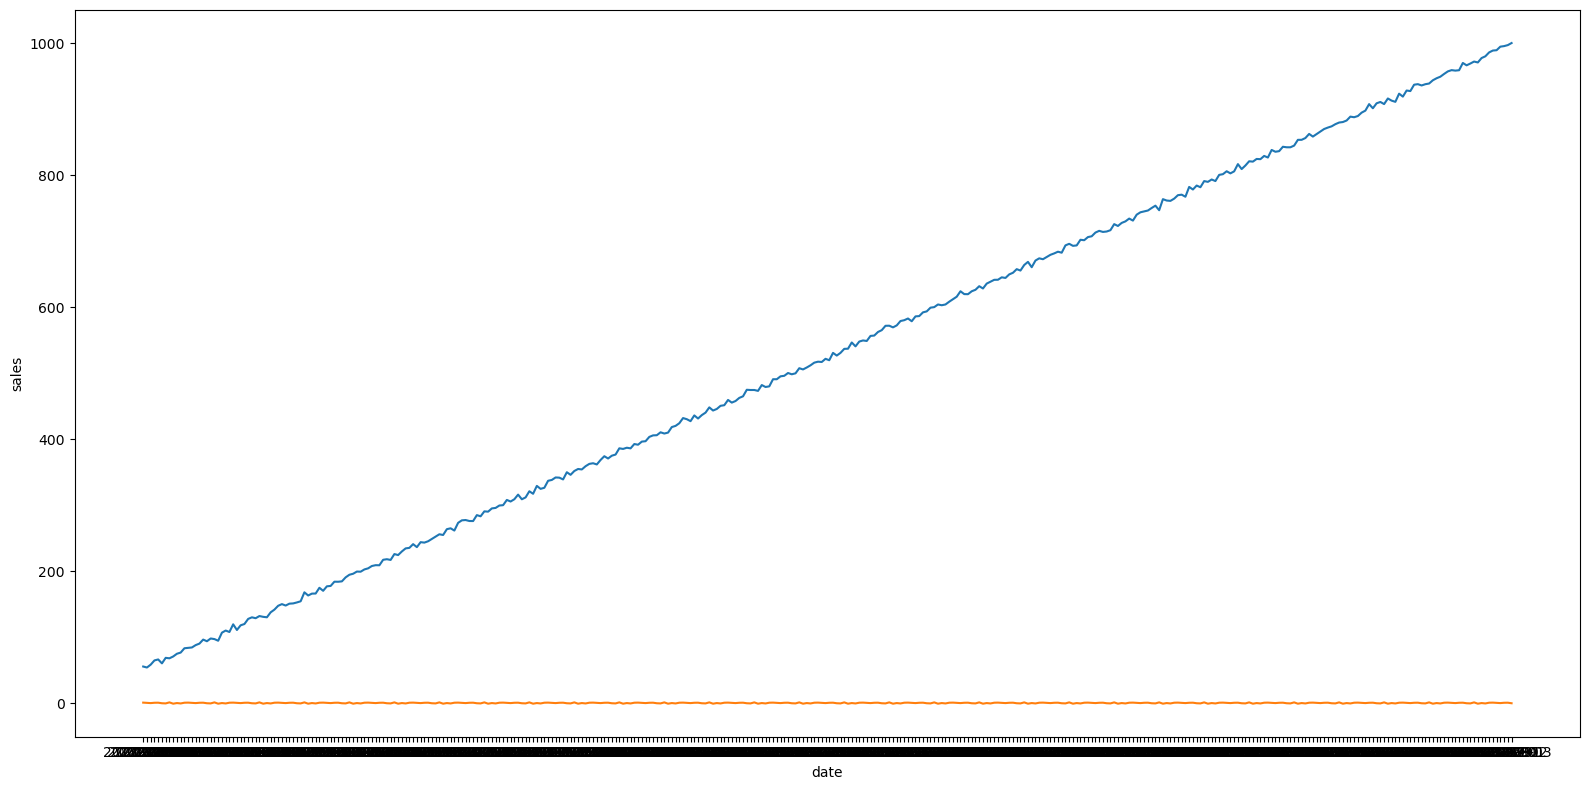

In [136]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (16, 8))

sns.lineplot(data = ts)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

In [137]:
def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

In [138]:
test_stationarity(ts)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

In [139]:
df_dif = pd.DataFrame(data)

In [140]:
df_dif

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [141]:
df_dif['date'] = pd.to_datetime(df_dif['date']).dt.strftime('%Y-%m-%d')
df_dif = df_dif.set_index('date')
df_dif

,sales
date,
2022-09-03,55.292157
2022-09-04,53.803211
2022-09-05,58.141693
2022-09-06,64.530899
2022-09-07,66.013633
...,...
2023-08-30,989.600354
2023-08-31,994.987326
2023-09-01,995.814415


In [142]:
df_dif['sales_diff'] = df_dif['sales'].diff().dropna()

ts_df_dif = df_dif['sales_diff']
ts_df_dif.dropna(inplace = True)

ts_df_dif

date
2022-09-04   -1.488946
2022-09-05    4.338482
2022-09-06    6.389205
2022-09-07    1.482734
2022-09-08   -5.931768
                ...   
2023-08-30    0.518681
2023-08-31    5.386972
2023-09-01    0.827090
2023-09-02    1.535798
2023-09-03    3.132571
Name: sales_diff, Length: 365, dtype: float64

In [143]:
# Test de Dickey-Fuller en la serie diferenciada
test_stationarity(ts_df_dif)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -9.430263e+00
p-value                        5.212954e-16
#Lags Used                     1.200000e+01
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64

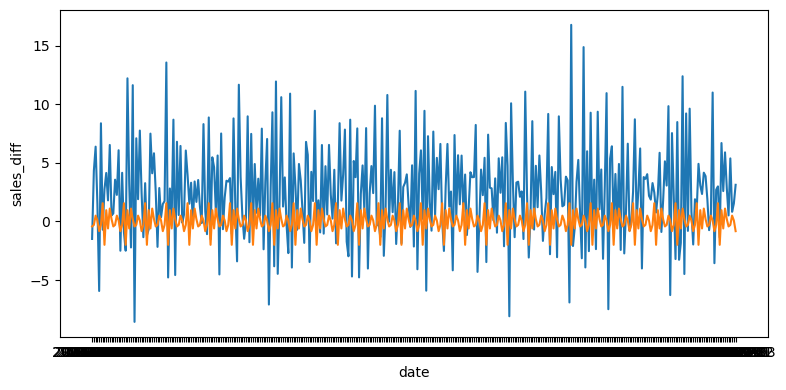

In [144]:
flights_dif_decomposition = seasonal_decompose(ts_df_dif, period = 12)

flights_dif_seasonal = flights_dif_decomposition.seasonal

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = ts_df_dif)
sns.lineplot(data = flights_dif_seasonal)

plt.tight_layout()

plt.show()

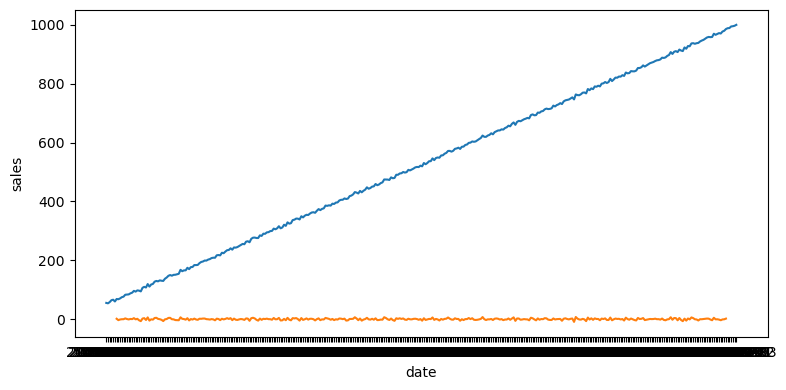

In [145]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = ts)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

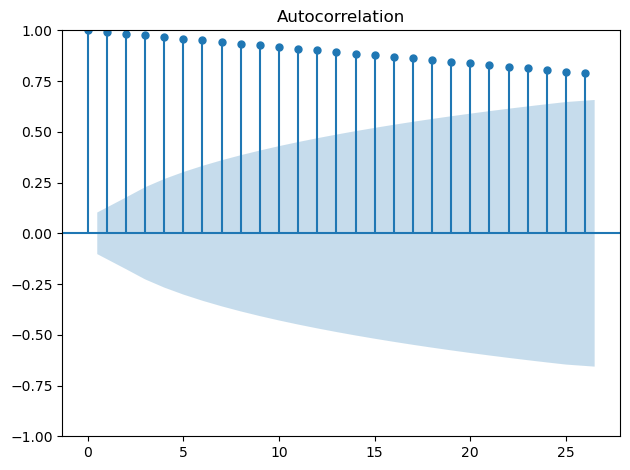

In [146]:
plot_acf(ts)

plt.tight_layout()

plt.show()

In [147]:
ts

date
2022-09-03      55.292157
2022-09-04      53.803211
2022-09-05      58.141693
2022-09-06      64.530899
2022-09-07      66.013633
                 ...     
2023-08-30     989.600354
2023-08-31     994.987326
2023-09-01     995.814415
2023-09-02     997.350214
2023-09-03    1000.482785
Name: sales, Length: 366, dtype: float64

In [148]:
ts_stationary = ts.diff().dropna()
test_stationarity(ts_stationary)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -9.430263e+00
p-value                        5.212954e-16
#Lags Used                     1.200000e+01
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64

In [149]:
ts_stationary

date
2022-09-04   -1.488946
2022-09-05    4.338482
2022-09-06    6.389205
2022-09-07    1.482734
2022-09-08   -5.931768
                ...   
2023-08-30    0.518681
2023-08-31    5.386972
2023-09-01    0.827090
2023-09-02    1.535798
2023-09-03    3.132571
Name: sales, Length: 365, dtype: float64

In [150]:
model = auto_arima(ts_stationary, seasonal = True, trace = True, m = 12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1847.122, Time=1.08 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2096.542, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1972.854, Time=0.15 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2209.657, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=1845.127, Time=0.65 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=1843.049, Time=0.35 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=1845.092, Time=0.85 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=1843.587, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=1841.533, Time=0.37 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=1843.435, Time=0.95 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=1843.433, Time=0.76 sec
 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1839.553, Time=0.19 sec
 ARIMA(1,0,1)(1,0,0)[12] inte

In [151]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -915.776
Date:                Thu, 25 Jul 2024   AIC                           1839.553
Time:                        12:37:02   BIC                           1855.152
Sample:                    09-04-2022   HQIC                          1845.752
                         - 09-03-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.8110      0.134     21.055      0.000       2.549       3.073
ar.L1         -0.0821      0.052     -1.592      0.111      -0.183       0.019
ma.L1         -0.9413      0.020    -47.701      0.000      -0.980      -0.903
sigma2         8.7903      0.688     12.777      0.000       7.442      10.139
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.76
Prob(Q):                              1.00   Prob(JB):                         0.68
Heteroskedasticity (H):               0.90   Skew:                             0.07
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [152]:
forecast = model.predict(12)
forecast

2023-09-04    1.675366
2023-09-05    2.673520
2023-09-06    2.591621
2023-09-07    2.598341
2023-09-08    2.597789
2023-09-09    2.597834
2023-09-10    2.597831
2023-09-11    2.597831
2023-09-12    2.597831
2023-09-13    2.597831
2023-09-14    2.597831
2023-09-15    2.597831
Freq: D, dtype: float64

In [153]:
sales = df['sales']

TypeError: tz must be string or tzinfo subclass, not <matplotlib.category.UnitData object at 0x000001780C044A70>.

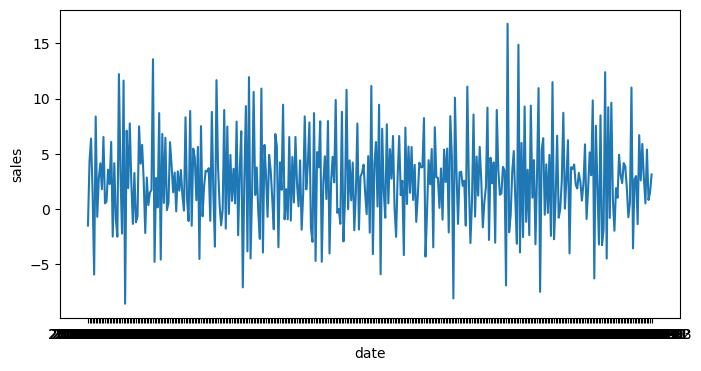

In [154]:
fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = ts_stationary)
sns.lineplot(data = forecast, c = "green")

plt.tight_layout()

plt.show()

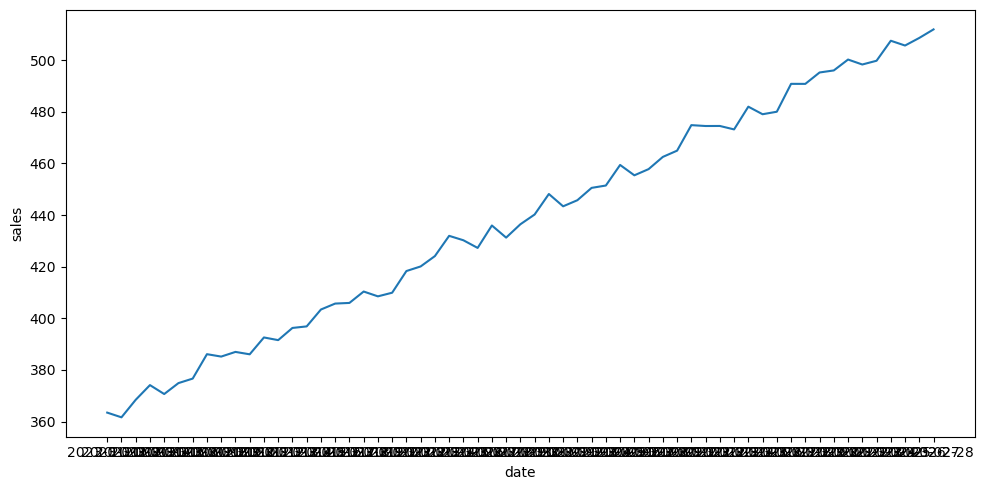

In [ ]:
start_date = "2023-01"
end_date = "2023-03"

# selecciono periodo de observación
periodo = (sales.index> start_date) & (sales.index <= end_date)

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = sales.loc[periodo])

plt.tight_layout()
